In [11]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings
warnings.filterwarnings("ignore")

In [12]:
#Importing the data
train= pd.read_csv('Price_train.csv')
test= pd.read_csv('Price_test.csv')

In [13]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [14]:
#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array which wont
#be considered in scaling
train_open= train.iloc[:, 1:2].values


In [15]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [16]:
train_open_scaled[60]

array([0.08627874])

In [17]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [18]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [19]:
xtrain.shape

(1198, 60, 1)

### Building the LSTM Network

In [20]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [21]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
40/40 [==============================] - 12s 63ms/step - loss: 0.0363
Epoch 2/100
40/40 [==============================] - 3s 69ms/step - loss: 0.0057
Epoch 3/100
40/40 [==============================] - 3s 67ms/step - loss: 0.0052
Epoch 4/100
40/40 [==============================] - 2s 61ms/step - loss: 0.0051
Epoch 5/100
40/40 [==============================] - 2s 52ms/step - loss: 0.0047
Epoch 6/100
40/40 [==============================] - 2s 60ms/step - loss: 0.0045
Epoch 7/100
40/40 [==============================] - 3s 64ms/step - loss: 0.0052
Epoch 8/100
40/40 [==============================] - 3s 66ms/step - loss: 0.0048
Epoch 9/100
40/40 [==============================] - 2s 62ms/step - loss: 0.0043
Epoch 10/100
40/40 [==============================] - 2s 61ms/step - loss: 0.0044
Epoch 11/100
40/40 [==============================] - 2s 62ms/step - loss: 0.0041
Epoch 12/100
40/40 [==============================] - 2s 60ms/step - loss: 0.0042
Epoch 13/100
40/40 [====

In [31]:

test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [32]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [33]:
xtest= np.array(xtest)

In [34]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

1/1 [==============================] - 0s 103ms/step


In [35]:
predicted_value= ss.inverse_transform(predicted_value)

### Plotting the data

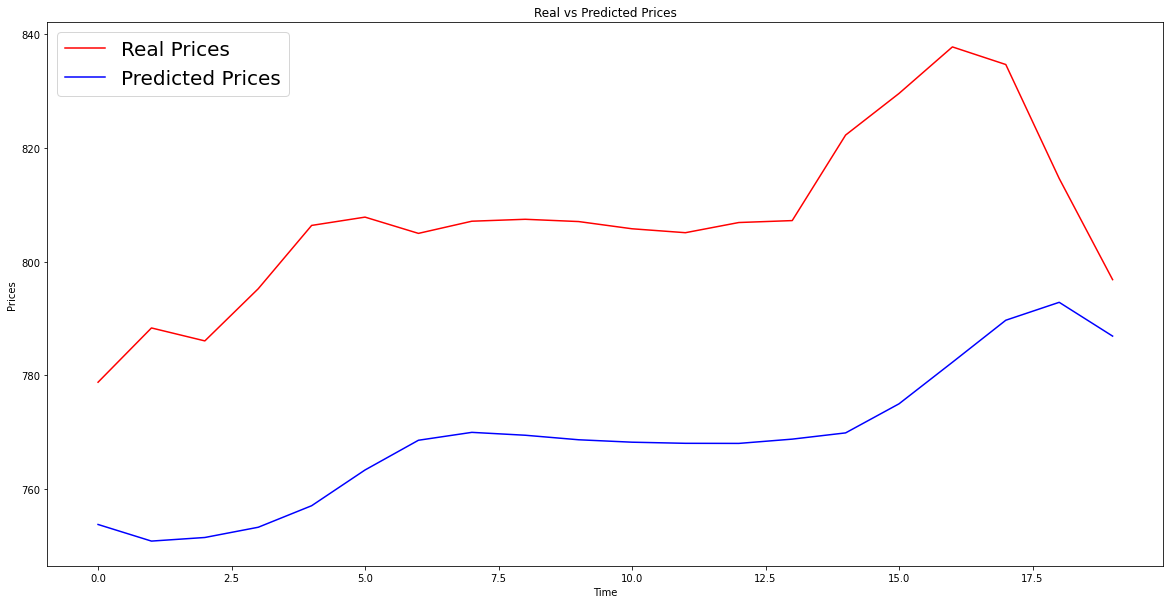

In [36]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)


In [28]:
from keras.wrappers.scikit_learn import KerasRegressor

In [29]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

In [30]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/50
30/30 [==============================] - 8s 62ms/step - loss: 0.0424
Epoch 2/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0177
Epoch 3/50
30/30 [==============================] - 2s 73ms/step - loss: 0.0147
Epoch 4/50
30/30 [==============================] - 2s 58ms/step - loss: 0.0137
Epoch 5/50
30/30 [==============================] - 2s 57ms/step - loss: 0.0125
Epoch 6/50
30/30 [==============================] - 2s 59ms/step - loss: 0.0097
Epoch 7/50
30/30 [==============================] - 2s 58ms/step - loss: 0.0115
Epoch 8/50
30/30 [==============================] - 2s 56ms/step - loss: 0.0077
Epoch 9/50
30/30 [==============================] - 2s 52ms/step - loss: 0.0107
Epoch 10/50
30/30 [==============================] - 2s 51ms/step - loss: 0.0093
Epoch 11/50
30/30 [==============================] - 2s 65ms/step - loss: 0.0082
Epoch 12/50
30/30 [==============================] - 2s 82ms/step - loss: 0.0083
Epoch 13/50
30/30 [==================

8/8 [==============================] - 2s 28ms/step - loss: 7.1422e-04
Epoch 1/50
30/30 [==============================] - 8s 58ms/step - loss: 0.0374
Epoch 2/50
30/30 [==============================] - 2s 66ms/step - loss: 0.0142
Epoch 3/50
30/30 [==============================] - 2s 72ms/step - loss: 0.0100
Epoch 4/50
30/30 [==============================] - 2s 76ms/step - loss: 0.0123
Epoch 5/50
30/30 [==============================] - 2s 77ms/step - loss: 0.0109
Epoch 6/50
30/30 [==============================] - 2s 70ms/step - loss: 0.0078
Epoch 7/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0084
Epoch 8/50
30/30 [==============================] - 2s 74ms/step - loss: 0.0087
Epoch 9/50
30/30 [==============================] - 2s 73ms/step - loss: 0.0076
Epoch 10/50
30/30 [==============================] - 2s 70ms/step - loss: 0.0068
Epoch 11/50
30/30 [==============================] - 2s 70ms/step - loss: 0.0077
Epoch 12/50
30/30 [============================

8/8 [==============================] - 1s 23ms/step - loss: 0.0033
Epoch 1/50
30/30 [==============================] - 8s 63ms/step - loss: 0.0251
Epoch 2/50
30/30 [==============================] - 2s 70ms/step - loss: 0.0091
Epoch 3/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0074
Epoch 4/50
30/30 [==============================] - 2s 68ms/step - loss: 0.0081
Epoch 5/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0070
Epoch 6/50
30/30 [==============================] - 2s 72ms/step - loss: 0.0065
Epoch 7/50
30/30 [==============================] - 3s 98ms/step - loss: 0.0058
Epoch 8/50
30/30 [==============================] - 3s 86ms/step - loss: 0.0059
Epoch 9/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0058
Epoch 10/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0051
Epoch 11/50
30/30 [==============================] - 2s 70ms/step - loss: 0.0046
Epoch 12/50
30/30 [==============================] 

20/20 [==============================] - 2s 95ms/step - loss: 0.2747
Epoch 25/25
5/5 [==============================] - 2s 26ms/step - loss: 0.1005
Epoch 1/25
20/20 [==============================] - 8s 73ms/step - loss: 0.3301
Epoch 2/25
20/20 [==============================] - 2s 80ms/step - loss: 0.3277
Epoch 3/25
20/20 [==============================] - 2s 91ms/step - loss: 0.3266
Epoch 4/25
20/20 [==============================] - 2s 78ms/step - loss: 0.3223
Epoch 5/25
20/20 [==============================] - 2s 78ms/step - loss: 0.3194
Epoch 6/25
20/20 [==============================] - 2s 79ms/step - loss: 0.3162
Epoch 7/25
20/20 [==============================] - 2s 78ms/step - loss: 0.3132
Epoch 8/25
20/20 [==============================] - 2s 76ms/step - loss: 0.3085
Epoch 9/25
20/20 [==============================] - 2s 79ms/step - loss: 0.3072
Epoch 10/25
20/20 [==============================] - 2s 78ms/step - loss: 0.3053
Epoch 11/25
20/20 [==============================] 

20/20 [==============================] - 2s 83ms/step - loss: 0.0077
Epoch 23/50
20/20 [==============================] - 2s 80ms/step - loss: 0.0079
Epoch 24/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0068
Epoch 25/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0070
Epoch 26/50
20/20 [==============================] - 2s 80ms/step - loss: 0.0063
Epoch 27/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0064
Epoch 28/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0069
Epoch 29/50
20/20 [==============================] - 2s 87ms/step - loss: 0.0066
Epoch 30/50
20/20 [==============================] - 2s 89ms/step - loss: 0.0066
Epoch 31/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0055
Epoch 32/50
20/20 [==============================] - 2s 80ms/step - loss: 0.0054
Epoch 33/50
20/20 [==============================] - 2s 77ms/step - loss: 0.0056
Epoch 34/50
20/20 [=====================

20/20 [==============================] - 2s 80ms/step - loss: 0.0057
Epoch 22/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0066
Epoch 23/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0061
Epoch 24/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0057
Epoch 25/50
20/20 [==============================] - 2s 92ms/step - loss: 0.0065
Epoch 26/50
20/20 [==============================] - 2s 82ms/step - loss: 0.0049
Epoch 27/50
20/20 [==============================] - 2s 77ms/step - loss: 0.0049
Epoch 28/50
20/20 [==============================] - 2s 80ms/step - loss: 0.0066
Epoch 29/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0052
Epoch 30/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0055
Epoch 31/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0049
Epoch 32/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0051
Epoch 33/50
20/20 [=====================

20/20 [==============================] - 2s 85ms/step - loss: 0.0033
Epoch 21/50
20/20 [==============================] - 2s 83ms/step - loss: 0.0044
Epoch 22/50
20/20 [==============================] - 2s 87ms/step - loss: 0.0048
Epoch 23/50
20/20 [==============================] - 2s 92ms/step - loss: 0.0043
Epoch 24/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0042
Epoch 25/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0041
Epoch 26/50
20/20 [==============================] - 2s 78ms/step - loss: 0.0040
Epoch 27/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0036
Epoch 28/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0036
Epoch 29/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0037
Epoch 30/50
20/20 [==============================] - 2s 79ms/step - loss: 0.0032
Epoch 31/50
20/20 [==============================] - 2s 77ms/step - loss: 0.0039
Epoch 32/50
20/20 [=====================

Epoch 19/25
30/30 [==============================] - 3s 89ms/step - loss: 0.0040
Epoch 20/25
30/30 [==============================] - 3s 87ms/step - loss: 0.0042
Epoch 21/25
30/30 [==============================] - 3s 90ms/step - loss: 0.0036
Epoch 22/25
30/30 [==============================] - 2s 74ms/step - loss: 0.0043
Epoch 23/25
30/30 [==============================] - 2s 69ms/step - loss: 0.0039
Epoch 24/25
30/30 [==============================] - 2s 73ms/step - loss: 0.0037
Epoch 25/25
8/8 [==============================] - 2s 23ms/step - loss: 0.0010
Epoch 1/25
30/30 [==============================] - 10s 72ms/step - loss: 0.0383
Epoch 2/25
30/30 [==============================] - 2s 67ms/step - loss: 0.0062
Epoch 3/25
30/30 [==============================] - 2s 68ms/step - loss: 0.0050
Epoch 4/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0052
Epoch 5/25
30/30 [==============================] - 2s 76ms/step - loss: 0.0057
Epoch 6/25
30/30 [================

30/30 [==============================] - 2s 75ms/step - loss: 0.0065
Epoch 18/25
30/30 [==============================] - 3s 90ms/step - loss: 0.0060
Epoch 19/25
30/30 [==============================] - 3s 84ms/step - loss: 0.0060
Epoch 20/25
30/30 [==============================] - 2s 78ms/step - loss: 0.0057
Epoch 21/25
30/30 [==============================] - 2s 69ms/step - loss: 0.0057
Epoch 22/25
30/30 [==============================] - 2s 74ms/step - loss: 0.0056
Epoch 23/25
30/30 [==============================] - 2s 79ms/step - loss: 0.0060
Epoch 24/25
30/30 [==============================] - 2s 77ms/step - loss: 0.0053
Epoch 25/25
8/8 [==============================] - 2s 19ms/step - loss: 0.0014
Epoch 1/25
30/30 [==============================] - 10s 78ms/step - loss: 0.1248
Epoch 2/25
30/30 [==============================] - 3s 86ms/step - loss: 0.0761
Epoch 3/25
30/30 [==============================] - 2s 76ms/step - loss: 0.0630
Epoch 4/25
30/30 [==========================

38/38 [==============================] - 3s 81ms/step - loss: 0.0044
Epoch 16/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0038
Epoch 17/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0036
Epoch 18/25
38/38 [==============================] - 3s 78ms/step - loss: 0.0037
Epoch 19/25
38/38 [==============================] - 3s 76ms/step - loss: 0.0034
Epoch 20/25
38/38 [==============================] - 3s 80ms/step - loss: 0.0031
Epoch 21/25
38/38 [==============================] - 3s 77ms/step - loss: 0.0039
Epoch 22/25
38/38 [==============================] - 3s 78ms/step - loss: 0.0032
Epoch 23/25
38/38 [==============================] - 3s 76ms/step - loss: 0.0034
Epoch 24/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0034
Epoch 25/25
38/38 [==============================] - 3s 74ms/step - loss: 0.0030


In [35]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/25
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0461
Epoch 2/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0152
Epoch 3/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0135
Epoch 4/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0131
Epoch 5/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0105
Epoch 6/25
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0103
Epoch 7/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0089
Epoch 8/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0091
Epoch 9/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0083
Epoch 10/25
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0073
Epoch 11/25
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0078
Epoch 12/25
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0080

In [37]:
model

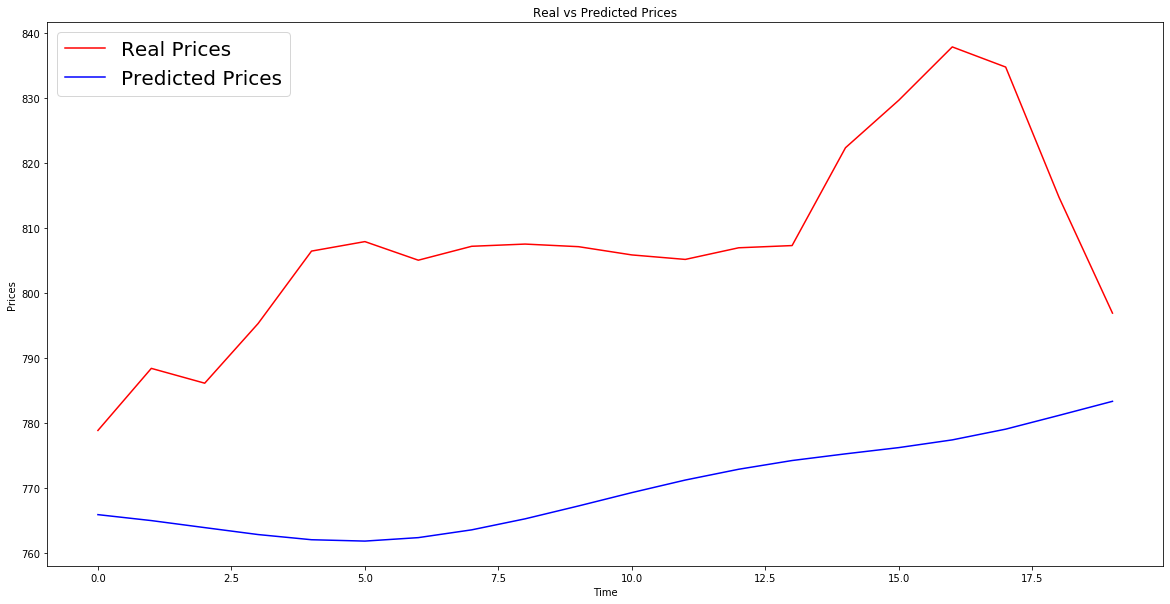

In [40]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)
